In [77]:
!pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [78]:
data = pd.read_csv('train.csv')

"""
* id: Уникальный идентификатор каждого эпизода подкаста.
* Podcast_Name: Название подкаста.
* Episode_Title: Название опубликованного эпизода.
* Episode_Length_minutes: Общая продолжительность эпизода в минутах.
* Genre: Категория или жанр, к которому относится подкаст.
* Host_Popularity_percentage: Популярность ведущего в процентах.
* Publication_Day: День недели, когда эпизод был опубликован.
* Publication_Time: Время суток, когда эпизод был выпущен.
* Guest_Popularity_percentage: Если применимо, популярность приглашённого гостя в процентах.
* Number_of_Ads: Количество рекламных вставок в эпизоде.
* Episode_Sentiment: Общее эмоциональное настроение эпизода (например, позитивное, негативное, нейтральное).
* Listening_Time_minutes: Среднее время прослушивания эпизода в минутах.
"""

'\n* id: Уникальный идентификатор каждого эпизода подкаста.\n* Podcast_Name: Название подкаста.\n* Episode_Title: Название опубликованного эпизода.\n* Episode_Length_minutes: Общая продолжительность эпизода в минутах.\n* Genre: Категория или жанр, к которому относится подкаст.\n* Host_Popularity_percentage: Популярность ведущего в процентах.\n* Publication_Day: День недели, когда эпизод был опубликован.\n* Publication_Time: Время суток, когда эпизод был выпущен.\n* Guest_Popularity_percentage: Если применимо, популярность приглашённого гостя в процентах.\n* Number_of_Ads: Количество рекламных вставок в эпизоде.\n* Episode_Sentiment: Общее эмоциональное настроение эпизода (например, позитивное, негативное, нейтральное).\n* Listening_Time_minutes: Среднее время прослушивания эпизода в минутах.\n'

In [79]:
df = pd.DataFrame(data)
df.shape

(750000, 12)

750 000 строк, 12 колонок

In [80]:
df.head()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [81]:
df.tail()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939
749999,749999,Sports Central,Episode 99,24.10,Sports,22.45,Saturday,Night,36.72,0.0,Neutral,11.94439


`Episode_Length_minutes` и `Guest_Popularity_percentage` имеют много пропусков, надо будет подумать почему и что с ними делать.


Целевая переменная - Listening_Time_minutes — среднее время прослушивания. Это ключевой показатель успеха эпизода, и надо понять, что на него влияет.

In [82]:
df.head() # начало датасета

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [83]:
df.tail() # конец датасета

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939
749999,749999,Sports Central,Episode 99,24.10,Sports,22.45,Saturday,Night,36.72,0.0,Neutral,11.94439


In [84]:
df.isnull().sum() # проверка пустых значений в данных

id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

In [85]:
df.select_dtypes(include=[np.number]).columns.tolist() # числовые значения

['id',
 'Episode_Length_minutes',
 'Host_Popularity_percentage',
 'Guest_Popularity_percentage',
 'Number_of_Ads',
 'Listening_Time_minutes']

In [86]:
df.select_dtypes(include=['object']).columns.tolist() # категориальные

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [ ]:
df.sample(5, random_state=42) # рандомная выборка для наглядности дальнейшего анализа

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
404846,404846,Daily Digest,Episode 74,46.59,News,58.43,Wednesday,Night,81.92,2.0,Positive,20.91979
580313,580313,Joke Junction,Episode 30,45.37,Comedy,76.57,Wednesday,Night,45.79,0.0,Positive,42.66054
552086,552086,Business Briefs,Episode 16,54.67,Business,96.00,Saturday,Afternoon,NaN,3.0,Positive,43.30069
370876,370876,Brain Boost,Episode 31,61.76,Education,69.57,Sunday,Morning,17.08,1.0,Positive,48.56000
239330,239330,Humor Hub,Episode 15,NaN,Comedy,79.20,Saturday,Morning,21.31,0.0,Positive,48.53842


In [ ]:
df.groupby(['Number_of_Ads']).count()

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Episode_Sentiment,Listening_Time_minutes
Number_of_Ads,,,,,,,,,,,
0.00,217592,217592,217592,191319,217592,217592,217592,217592,178882,217592,217592
1.00,214069,214069,214069,189861,214069,214069,214069,214069,177223,214069,214069
2.00,158156,158156,158156,139612,158156,158156,158156,158156,124185,158156,158156
3.00,160173,160173,160173,142105,160173,160173,160173,160173,123672,160173,160173
12.00,1,1,1,1,1,1,1,1,1,1,1
53.37,1,1,1,1,1,1,1,1,0,1,1
53.42,1,1,1,1,1,1,1,1,0,1,1
103.00,1,1,1,1,1,1,1,1,1,1,1
103.25,2,2,2,2,2,2,2,2,2,2,2


какие-то стремные данные в `Number_of_Ads` начиная с `53.37` - `103.91`

In [ ]:
df[df['Number_of_Ads'] > 3] # посмотрим на эти аномалии

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
211159,211159,Wellness Wave,Episode 83,64.83,Health,48.46,Sunday,Evening,NaN,53.37,Positive,50.44892
283606,283606,Health Hour,Episode 15,109.93,Health,67.81,Sunday,Morning,77.90,103.91,Neutral,103.89696
436577,436577,Sports Central,Episode 64,115.25,Sports,28.58,Saturday,Afternoon,23.65,103.00,Neutral,103.12686
495919,495919,Comedy Corner,Episode 79,64.83,Comedy,48.37,Saturday,Evening,NaN,53.42,Neutral,50.44892
537705,537705,Sound Waves,Episode 64,112.27,Music,28.95,Saturday,Morning,10.15,103.75,Neutral,103.12686
567235,567235,Detective Diaries,Episode 21,16.13,True Crime,49.11,Tuesday,Evening,43.17,12.00,Positive,6.49000
602553,602553,Sound Waves,Episode 53,112.27,Music,28.19,Tuesday,Morning,23.15,103.25,Neutral,103.12686
672139,672139,Sound Waves,Episode 35,115.74,Music,28.95,Tuesday,Afternoon,23.50,103.25,Neutral,103.12686
683147,683147,Crime Chronicles,Episode 15,109.93,True Crime,59.66,Tuesday,Evening,77.91,103.88,Neutral,103.89696


у последнего id=683147 на 109.93 минуты эпизода указано 103.88 рекламы, причем не в минутах, а в виде значения "количество=число", всё это попахивает ошибками. я бы скипнул это из выборки эти 9 примеров.

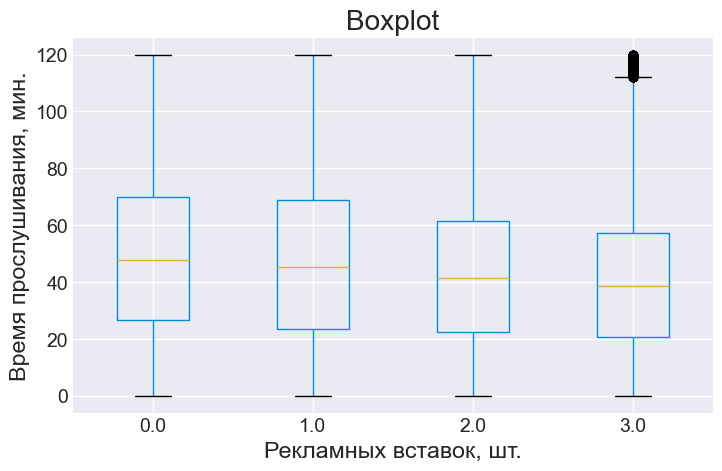

In [ ]:
filtered_df = df[df['Number_of_Ads'] <= 3] # исключаем строки с некорректными данными по рекламе

# Строим boxplot
filtered_df.boxplot(column='Listening_Time_minutes', by='Number_of_Ads', figsize=(8, 5))
plt.title('Boxplot')
plt.xlabel('Рекламных вставок, шт.')
plt.ylabel('Время прослушивания, мин.')
plt.suptitle('')
plt.show()

Делаем вывод, что чем меньше рекламных вставок - тем дольше время прослушивания (ВНЕЗАПНО). Надо получше поботать про усы и их интерпретацию в случае с 3 рекламами.

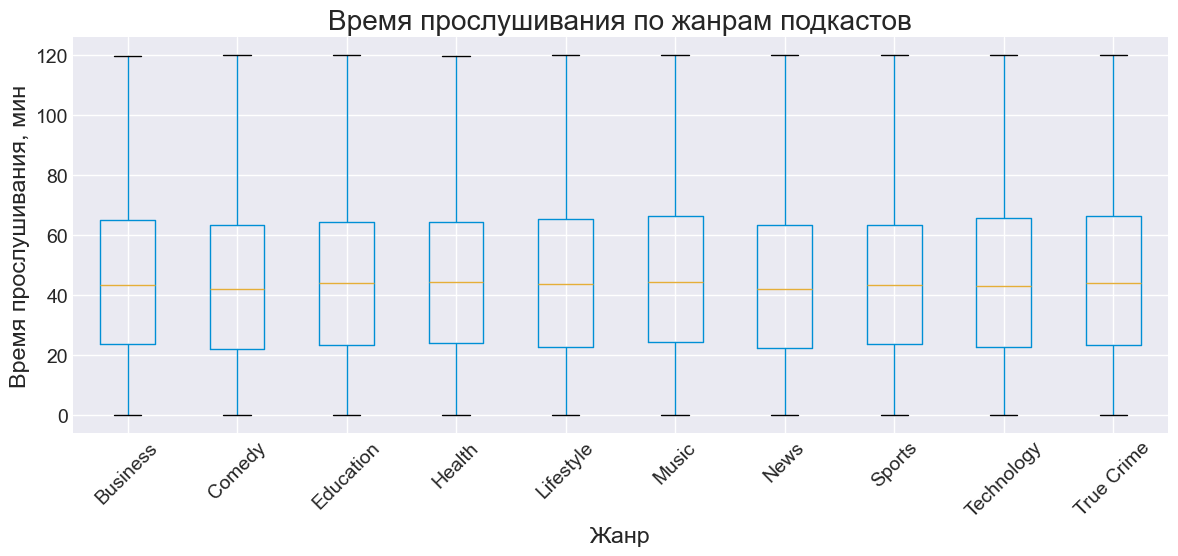

In [ ]:
# Boxplot: Listening_Time_minutes по жанрам
df.boxplot(
    column='Listening_Time_minutes', 
    by='Genre', 
    figsize=(12, 6),
    rot=45  # Поворачиваем подписи жанров
)
plt.title('Время прослушивания по жанрам подкастов')
plt.suptitle('')
plt.xlabel('Жанр')
plt.ylabel('Время прослушивания, мин')
plt.tight_layout()
plt.show()

Комедийные и новостные подкасты слушают в среднем чуть меньше.

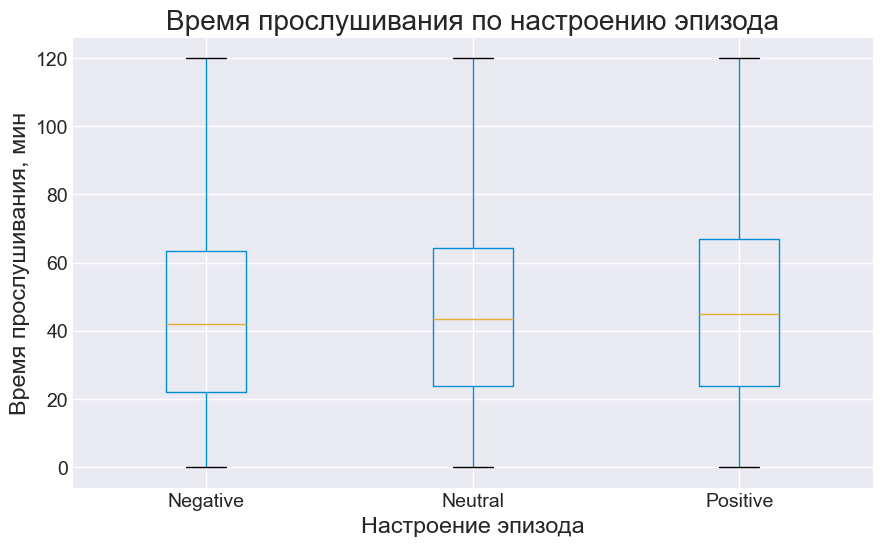

In [ ]:
# Boxplot: Listening_Time_minutes по настроению эпизода
df.boxplot(
    column='Listening_Time_minutes', 
    by='Episode_Sentiment', 
    figsize=(10, 6)
)
plt.title('Время прослушивания по настроению эпизода')
plt.suptitle('')
plt.xlabel('Настроение эпизода')
plt.ylabel('Время прослушивания, мин')
plt.show()

Позитивные подкасты слушают чуть дольше, негативные чуть меньше.

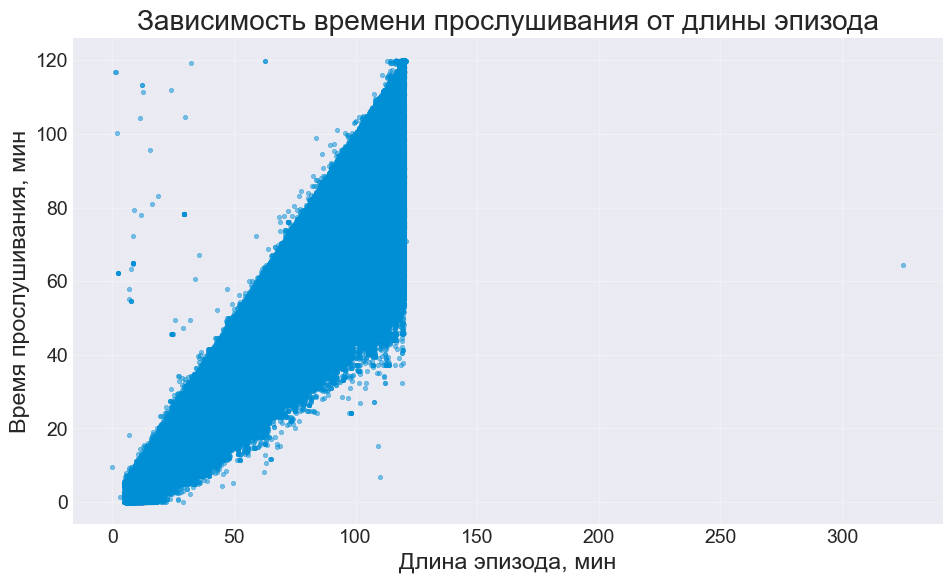

In [ ]:
# Удаляем строки с пропусками в обеих колонках одновременно
filtered_df = df.dropna(subset=['Episode_Length_minutes', 'Listening_Time_minutes'])

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Episode_Length_minutes'], 
            filtered_df['Listening_Time_minutes'], 
            alpha=0.5, s=10)
plt.title('Зависимость времени прослушивания от длины эпизода')
plt.xlabel('Длина эпизода, мин')
plt.ylabel('Время прослушивания, мин')
plt.grid(True, alpha=0.3)
plt.show()

картину портит выброс, удалим его

In [ ]:
df.groupby(['Episode_Length_minutes']).count()

,id,Podcast_Name,Episode_Title,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
Episode_Length_minutes,,,,,,,,,,,
0.00,1,1,1,1,1,1,1,0,1,1,1
1.24,1,1,1,1,1,1,1,1,1,1,1
1.48,1,1,1,1,1,1,1,1,1,1,1
1.84,1,1,1,1,1,1,1,1,1,1,1
2.47,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...
120.37,2,2,2,2,2,2,2,2,2,2,2
120.64,2,2,2,2,2,2,2,2,2,2,2
120.73,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
df[df['Episode_Length_minutes'] < 130] # 325 нам портит картину, исключим его!

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031
5,5,Fitness First,Episode 19,26.54,Health,48.96,Saturday,Afternoon,NaN,3.0,Positive,22.77047
...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,Learning Lab,Episode 25,75.66,Education,69.36,Saturday,Morning,NaN,0.0,Negative,56.87058
749996,749996,Business Briefs,Episode 21,75.75,Business,35.21,Saturday,Night,NaN,2.0,Neutral,45.46242
749997,749997,Lifestyle Lounge,Episode 51,30.98,Lifestyle,78.58,Thursday,Morning,84.89,0.0,Negative,15.26000
749998,749998,Style Guide,Episode 47,108.98,Lifestyle,45.39,Thursday,Morning,93.27,0.0,Negative,100.72939


In [ ]:
df.groupby(['Listening_Time_minutes']).count()


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
Listening_Time_minutes,,,,,,,,,,,
0.00000,8551,8551,8551,7841,8551,8551,8551,8551,5424,8551,8551
0.00056,7,7,7,7,7,7,7,7,2,7,7
0.00175,8,8,8,8,8,8,8,8,7,8,8
0.00661,18,18,18,16,18,18,18,18,14,18,18
0.01050,7,7,7,6,7,7,7,7,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...
119.78000,17,17,17,13,17,17,17,17,14,17,17
119.79000,14,14,14,13,14,14,14,14,9,14,14
119.80000,18,18,18,15,18,18,18,18,17,18,18


Тут все норм, оставляем как есть.

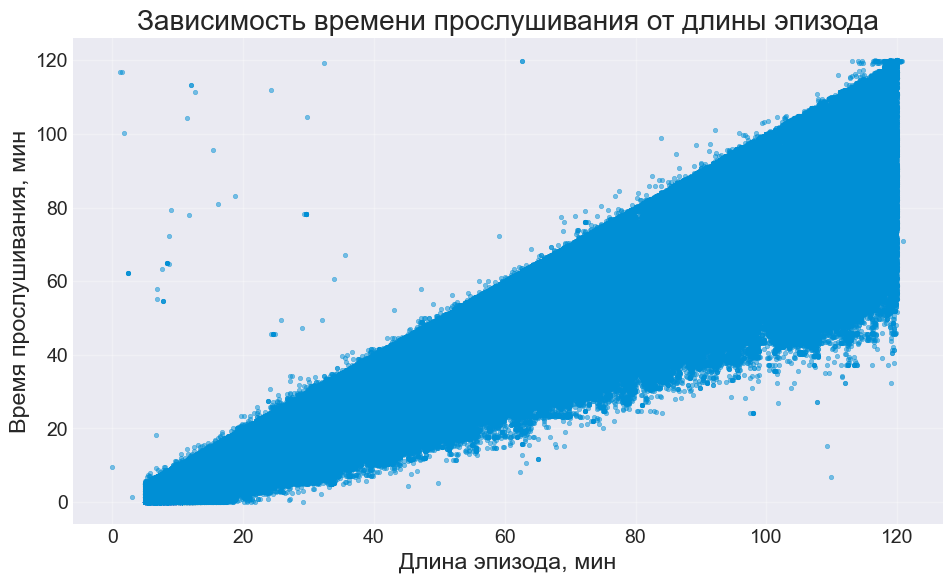

In [ ]:
filtered_df = df.dropna(subset=['Episode_Length_minutes', 'Listening_Time_minutes']) # Удаляем пропуски в обеих колонках одновременно
filtered_df = filtered_df[filtered_df['Episode_Length_minutes'] < 130] # убрали выброс 325

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Episode_Length_minutes'], 
            filtered_df['Listening_Time_minutes'], 
            alpha=0.5, s=10)
plt.title('Зависимость времени прослушивания от длины эпизода')
plt.xlabel('Длина эпизода, мин')
plt.ylabel('Время прослушивания, мин')
plt.grid(True, alpha=0.3)
plt.show()

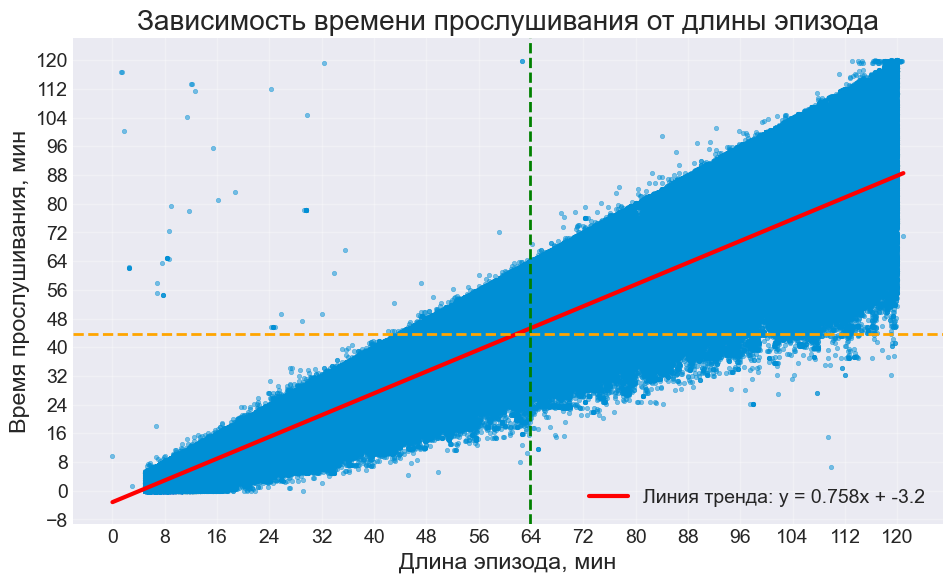

In [ ]:
filtered_df = df.dropna(subset=['Episode_Length_minutes', 'Listening_Time_minutes'])
filtered_df = filtered_df[filtered_df['Episode_Length_minutes'] < 130]

plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Episode_Length_minutes'], 
            filtered_df['Listening_Time_minutes'], 
            alpha=0.5, s=10)

# 1. Линия тренда (deepseek)
z = np.polyfit(filtered_df['Episode_Length_minutes'], 
               filtered_df['Listening_Time_minutes'], 1)
p = np.poly1d(z)
x_range = np.linspace(filtered_df['Episode_Length_minutes'].min(), 
                      filtered_df['Episode_Length_minutes'].max(), 100)
plt.plot(x_range, p(x_range), "r-", linewidth=3, 
        label=f'Линия тренда: y = {z[0]:.3f}x + {z[1]:.1f}')

# 2. Медианы (пунктиром) (deepseek)
median_length = filtered_df['Episode_Length_minutes'].median()
median_listening = filtered_df['Listening_Time_minutes'].median()
plt.axvline(x=median_length, color='green', linestyle='--', linewidth=2)
plt.axhline(y=median_listening, color='orange', linestyle='--', linewidth=2)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(20))

plt.title('Зависимость времени прослушивания от длины эпизода')
plt.xlabel('Длина эпизода, мин')
plt.ylabel('Время прослушивания, мин')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

`для статистики заюзал дипсик чуток для отрисовки.`

медианы:
по длине эпизода = 64 мин
по времени прослушивания = 44 мин

Какой вывод: чем длиннее эпизод, тем дольше слушают в среднем.

Попробуем поискать зависимости числовых значений. возможно стрельнут Episode_Title Host_Popularity_percentage или Guest_Popularity_percentage. Потом еще можно будет заенкодить категориальные значения в числа и их проверить.

In [94]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(3).to_string())

                                id  Episode_Length_minutes  Host_Popularity_percentage  Guest_Popularity_percentage  Number_of_Ads  Listening_Time_minutes
id                           1.000                  -0.001                       0.000                        0.001          0.001                  -0.001
Episode_Length_minutes      -0.001                   1.000                       0.024                       -0.010         -0.055                   0.917
Host_Popularity_percentage   0.000                   0.024                       1.000                        0.022         -0.018                   0.051
Guest_Popularity_percentage  0.001                  -0.010                       0.022                        1.000          0.008                  -0.016
Number_of_Ads                0.001                  -0.055                      -0.018                        0.008          1.000                  -0.118
Listening_Time_minutes      -0.001                   0.917            

Episode_Length_minutes - Listening_Time_minutes = 0.917
подтверждает наш вывод по графику - `чем длиннее эпизод, тем дольше слушают в среднем.`

### Популярность ведущего почти не влияет на время прослушивания
Host_Popularity_percentage - Listening_Time_minutes: 0.051

### Популярность гостя тоже практически не влияет
Guest_Popularity_percentage - Listening_Time_minutes: -0.016

### Слабая корреляция: больше рекламы = чуть меньше слушают
Number_of_Ads - Listening_Time_minutes: -0.118

### Более длинные эпизоды имеют чуть меньше рекламы
Episode_Length_minutes - Number_of_Ads: -0.055


### Популярные ведущие просто приглашают популярных гостей
Host_Popularity - Guest_Popularity: 0.022

In [96]:
df.select_dtypes(include=['object']).columns.tolist() # уже смотрели, напомним себе что еще есть

['Podcast_Name',
 'Episode_Title',
 'Genre',
 'Publication_Day',
 'Publication_Time',
 'Episode_Sentiment']

In [102]:
for col in ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']:
    print(f"{col}: {len(df[col].dropna().unique())}")
    print(f" {sorted(df[col].dropna().unique())}")
    print()

Genre: 10
 ['Business', 'Comedy', 'Education', 'Health', 'Lifestyle', 'Music', 'News', 'Sports', 'Technology', 'True Crime']

Publication_Day: 7
 ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

Publication_Time: 4
 ['Afternoon', 'Evening', 'Morning', 'Night']

Episode_Sentiment: 3
 ['Negative', 'Neutral', 'Positive']



In [106]:
genre_map = {
    'Business': 0,
    'Comedy': 1,
    'Education': 2,
    'Health': 3,
    'Lifestyle': 4,
    'Music': 5,
    'News': 6,
    'Sports': 7,
    'Technology': 8,
    'True Crime': 9
}

day_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

time_map = {
    'Morning': 0,
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3
}

sentiment_map = {
    'Negative': 0,
    'Neutral': 1,
    'Positive': 2,
}

# кодируем пропуски как -1

df['Publication_Day_encoded'] = df['Publication_Day'].map(day_map).fillna(-1).astype(int)
df['Sentiment_encoded'] = df['Episode_Sentiment'].map(sentiment_map).fillna(-1).astype(int)
df['Publication_Time_encoded'] = df['Publication_Time'].map(time_map).fillna(-1).astype(int)
df['Genre_encoded'] = df['Genre'].map(genre_map).fillna(-1).astype(int)

In [112]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix.round(2).to_string()) # округлим для простоты

                              id  Episode_Length_minutes  Host_Popularity_percentage  Guest_Popularity_percentage  Number_of_Ads  Listening_Time_minutes  Publication_Day_encoded  Sentiment_encoded  Publication_Time_encoded  Genre_encoded
id                           1.0                   -0.00                        0.00                         0.00           0.00                   -0.00                    -0.00              -0.00                      0.00          -0.00
Episode_Length_minutes      -0.0                    1.00                        0.02                        -0.01          -0.05                    0.92                    -0.02               0.03                      0.02          -0.00
Host_Popularity_percentage   0.0                    0.02                        1.00                         0.02          -0.02                    0.05                     0.00               0.01                      0.00          -0.01
Guest_Popularity_percentage  0.0                

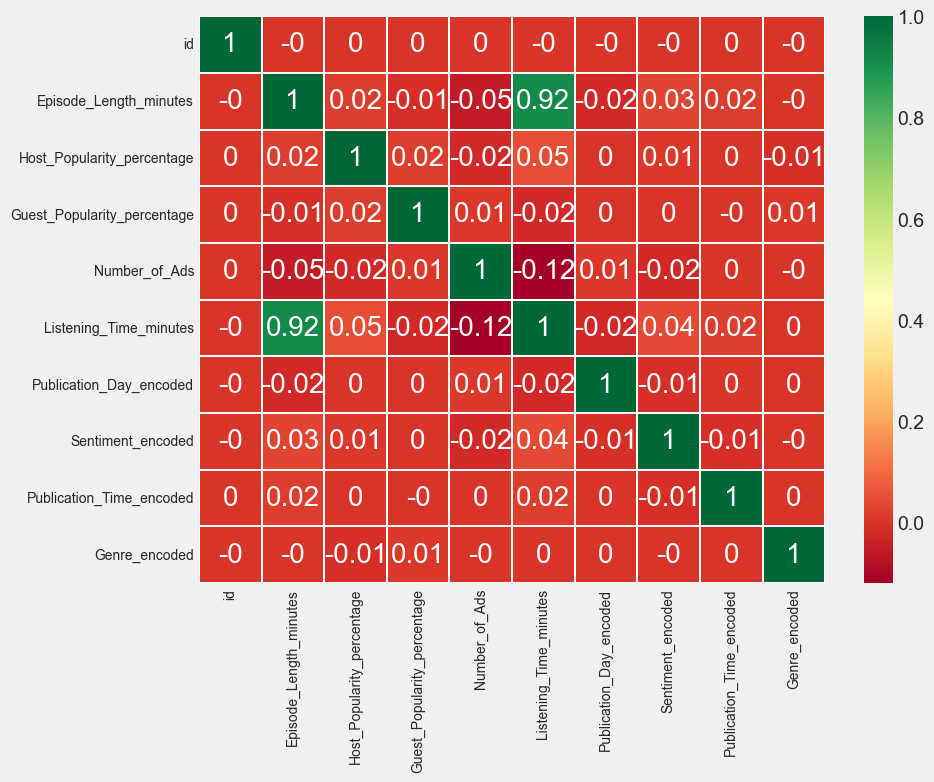

In [110]:
sns.heatmap(numeric_df.corr().round(2), annot=True, cmap='RdYlGn', linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(9,7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Позитивные эпизоды слушают немного дольше
Sentiment_encoded - Listening_Time_minutes: 0.04

### Есть небольшая корреляция со временем публикации(надо анализировать глубже средние значения)
Publication_Time_encoded - Listening_Time_minutes: 0.02

### Незначительное влияние дня недели
Publication_Day_encoded - Listening_Time_minutes: -0.02

# Что по итогу:
Episode_Length_minutes самый важный, видимо длинный подкаст сложнее бросить не дослушав до какого-то майлстоуна
Number_of_Ads - второй по важности, видимо раздражает, было бы интересно собрать данные по времени включения очередного блока рекламы и совпадает ли это с "выключением" подкаста.

В целом по сравнению с обычным анализом числовых значений на графике ничего важного мы не получили, но для фич инжиниринга могут пригодиться закодированные значения.